In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

num_classes = 4  # Thay bằng số lớp thực tế
model = models.mobilenet_v2(pretrained=True)
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model.last_channel, num_classes)
)

# Load trọng số mô hình đã lưu
model_save_path = r"D:\temp\pbl\pbl_2025\smart-trash-bin\AI\mobilenetv2_trashnet_combine_finetuned.pth"
model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))


c:\Users\Nguyet\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Nguyet\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

dataset_path = r"D:\temp\pbl\pbl_2025\smart-trash-bin\data\trashnet_split"

# Kích thước ảnh đầu vào của MobileNetV2
IMG_SIZE = 224
BATCH_SIZE = 32

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Không tìm thấy thư mục dữ liệu: {dataset_path}")

# Tiền xử lý ảnh (chuẩn hóa như ImageNet)
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dữ liệu huấn luyện và kiểm tra
train_dataset = ImageFolder(root=f"{dataset_path}/train", transform=transform)
val_dataset = ImageFolder(root=f"{dataset_path}/test", transform=transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
# Kiểm tra số lượng lớp
num_classes = len(train_dataset.classes)
print(f"Số lớp trong TrashNet: {num_classes}")


Số lớp trong TrashNet: 4


In [4]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(torch.device('cpu')), labels.to(torch.device('cpu'))
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

train_acc = 100. * correct / total
print(f"🎯 Độ chính xác trên tập train: {train_acc:.2f}%")


🎯 Độ chính xác trên tập train: 96.82%


Ảnh được dự đoán là: paper


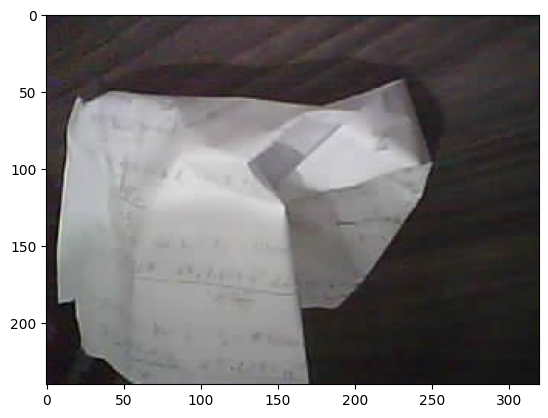

In [29]:
from PIL import Image
# Đường dẫn đến ảnh cần dự đoán
# image_path = r"D:\temp\pbl\received_images\20250226131151.jpg"  # thay bằng đường dẫn ảnh của bạn
# image_path = r"C:\Users\Nguyet\Downloads\download.jfif"
image_path = r"D:\temp\pbl\data_from_esp\paper\paper2.jpg"
#in ảnh
import matplotlib.pyplot as plt
image = Image.open(image_path)
plt.imshow(image)

# Mở ảnh và áp dụng tiền xử lý
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image)
input_tensor = input_tensor.unsqueeze(0)  # thêm chiều batch

# Chuyển mô hình sang chế độ đánh giá (nếu chưa)
model.eval()

# Dự đoán lớp của ảnh
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = outputs.max(1)

# Lấy tên lớp dựa vào danh sách các lớp đã được xác định từ train_dataset
predicted_class = train_dataset.classes[predicted.item()]
print(f"Ảnh được dự đoán là: {predicted_class}")